In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
water_data = pd.read_csv('water_data_outlier_cleaned_without_ld_mg.csv')

In [3]:
water_data.isna().sum()

pH                        13952
Iron                       5531
Nitrate                   13010
Chloride                  21382
Zinc                      19147
Color                         0
Turbidity                  6211
Fluoride                  23031
Copper                    24509
Odor                      21436
Sulfate                   23976
Chlorine                   7050
Total Dissolved Solids      200
Target                        0
dtype: int64

In [5]:
water_data.fillna(water_data.mean(), inplace = True)

In [6]:
water_data.isna().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Zinc                      0
Color                     0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Chlorine                  0
Total Dissolved Solids    0
Target                    0
dtype: int64

In [7]:
X = water_data.drop('Target', axis = 1)
y = water_data['Target']

In [28]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Step 1: Undersample the majority class
undersample = RandomUnderSampler(sampling_strategy=0.5)  # Adjust the ratio as needed
X_under, y_under = undersample.fit_resample(X, y)

# Step 2: Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy=1.0)  # This will balance the classes 1:1
X_resampled, y_resampled = smote.fit_resample(X_under, y_under)


In [16]:
y_resampled.value_counts()

Target
0    156026
1    156026
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1631d25c0>,
 [Text(-1.1, 1.3471114790620887e-16, 'Bad(0)'),
  Text(1.1, -2.6942229581241775e-16, 'Good(1)')],
 [Text(-0.6, 7.347880794884119e-17, '50.000%'),
  Text(0.6, -1.4695761589768238e-16, '50.000%')])

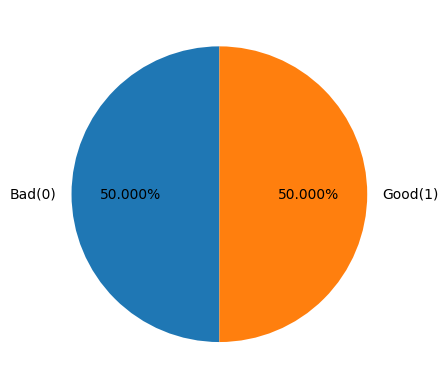

In [17]:
plt.pie(
    y_resampled.value_counts(),
    labels = ['Bad(0)', 'Good(1)'],
    startangle=90,
    autopct = '%1.3f%%'
)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

In [24]:
model = RandomForestClassifier()

In [25]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
y_pred = model.predict(X_test)

In [27]:
accuracy_score(y_pred, y_test)

0.9378936029168048

In [29]:
# F1 Score
f1 = f1_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Display the results
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")

F1 Score: 0.7473
Precision: 0.6653
Recall: 0.8523
Balanced Accuracy: 0.9003
